# Toma de decisiones basadas en datos

En el siguiente analisis se busca ayudar al Sr. Juan a decidir cual de sus cuatros tiendas de su cadena Alura Store deberia vender para iniciar un nuevo emprendimiento. Para ello, se consideran los siguientes puntos:

- Ingresos totales de las tiendas.
- Categorias de productos mas y menos vendidas 
- Calificaciones promedio de los clientes por tienda
- Productos mas y menos vendidos 
- Coste de envio promedio para cada tienda. 

El objetivo es identificar la tienda con menor rentabilidad y presentar una recomendacion final basada en los datos.

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [2]:
tienda.shape

(2359, 12)

In [25]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


# 1. Análisis de facturación

## 1.1 Ingreso total por tienda

Vamos a calcular el ingreso total por tienda sumando los valores de la columna __Precio__ ya que estos corresponden a los productos comprados por los clientes. Cada registro corresponde a la compra de un cliente. Cada valor se almacena en una lista para luego crear una dataframe de cada tienda con su correspondiente ingreso total.

In [3]:
# lista para guardar los ingresos de cada tienda
ingresos = []

# lista con los nombres de cada tienda
tiendas = ['Tienda_1', 'Tienda_2', 'Tienda_3', 'Tienda_4']

In [4]:
# ingreso tienda 1
ingreso_total_T1 = tienda.Precio.sum()
ingresos.append(ingreso_total_T1)
ingreso_total_T1

1150880400.0

In [5]:
# ingreso tienda 2
ingreso_total_T2 = tienda2.Precio.sum()
ingresos.append(ingreso_total_T2)
ingreso_total_T2

1116343500.0

In [6]:
# ingreso tienda 3
ingreso_total_T3 = tienda3.Precio.sum()
ingresos.append(ingreso_total_T3)
ingreso_total_T3

1098019600.0

In [7]:
# ingreso tienda 4
ingreso_total_T4 = tienda4.Precio.sum()
ingresos.append(ingreso_total_T4)
ingreso_total_T4

1038375700.0

In [8]:
# dataframe con los ingresos por tienda
tiendas_df = pd.DataFrame({
    'Tiendas': tiendas,
    'Ingreso_Total':ingresos
})

tiendas_df

,Tiendas,Ingreso_Total
0,Tienda_1,1.150880e+09
1,Tienda_2,1.116344e+09
2,Tienda_3,1.098020e+09
3,Tienda_4,1.038376e+09


> La tienda 4 es la que menos ingresos ha tenido

> La tienda 1 es la que presenta mayores ingresos.

## 1.2 Ventas por categoría

Vamos a obtener los nombres de cada categoria

In [9]:
tienda['Categoría del Producto'].unique()

array(['Electrónicos', 'Muebles', 'Juguetes', 'Electrodomésticos',
       'Artículos para el hogar', 'Deportes y diversión', 'Libros',
       'Instrumentos musicales'], dtype=object)

Ahora, calculamos la cantidad de productos vendidos por categoria para cada tienda.

In [10]:
# cantidad de productos vendidos por categoria de la tienda 1
conteo_T1 = tienda['Categoría del Producto'].value_counts().reset_index()
conteo_T1.columns = ['Categoria', 'Cantidad_T1']

# cantidad de productos vendidos por categoria de la tienda 2
conteo_T2 = tienda2['Categoría del Producto'].value_counts().reset_index()
conteo_T2.columns = ['Categoria', 'Cantidad_T2']

# cantidad de productos vendidos por categoria de la tienda 3
conteo_T3 = tienda3['Categoría del Producto'].value_counts().reset_index()
conteo_T3.columns = ['Categoria', 'Cantidad_T3']

# cantidad de productos vendidos por categoria de la tienda 1
conteo_T4 = tienda4['Categoría del Producto'].value_counts().reset_index()
conteo_T4.columns = ['Categoria', 'Cantidad_T4']

Unimos los resultados de cada tienda en un mismo dataframe para realizar una comparacion numerica. 

In [11]:
from functools import reduce

conteos_df = [conteo_T1, conteo_T2, conteo_T3, conteo_T4]
df_categorias_tiendas = reduce(lambda left, right: pd.merge(left, right, on='Categoria'), conteos_df)
df_categorias_tiendas

,Categoria,Cantidad_T1,Cantidad_T2,Cantidad_T3,Cantidad_T4
0,Muebles,465,442,499,480
1,Electrónicos,448,422,451,451
2,Juguetes,324,313,315,338
3,Electrodomésticos,312,305,278,254
4,Deportes y diversión,284,275,277,277
5,Instrumentos musicales,182,224,177,170
6,Libros,173,197,185,187
7,Artículos para el hogar,171,181,177,201


> Las 3 categorias mas vendidas de todas las tiendas son: Muebles, electronicos y juguetes.

> La tienda 3 posee mayor cantidad de ventas de muebles con un total de 499 unidades.

> Las tiendas 3 y 4 han vendido mayor cantidad de electronico con un total de 451 unidades.

> La tienda 4 ha vendido mayor cantidad de juguetes con un total de 338 unidades

Ahora, vamos a calcular los ingresos que se generan por categoria en cada tienda 

In [18]:
# ingreso por categoria para la tienda 1
ingreso_categoria_T1 = tienda.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ingreso_categoria_T1.columns = ['Categoria', 'Ingreso_T1']

# ingreso por categoria para la tienda 2
ingreso_categoria_T2 = tienda2.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ingreso_categoria_T2.columns = ['Categoria', 'Ingreso_T2']

# ingreso por categoria para la tienda 3
ingreso_categoria_T3 = tienda3.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ingreso_categoria_T3.columns = ['Categoria', 'Ingreso_T3']

# ingreso por categoria para la tienda 4
ingreso_categoria_T4 = tienda4.groupby('Categoría del Producto')['Precio'].sum().reset_index()
ingreso_categoria_T4.columns = ['Categoria', 'Ingreso_T4']

Unimos los resultados de cada tienda para compararlos.

In [19]:
from functools import reduce

ingresosC_df = [ingreso_categoria_T1, ingreso_categoria_T2, ingreso_categoria_T3, ingreso_categoria_T4]
ingresosC_tiendas = reduce(lambda left, right: pd.merge(left, right, on='Categoria'), ingresosC_df)
ingresosC_tiendas

,Categoria,Ingreso_T1,Ingreso_T2,Ingreso_T3,Ingreso_T4
0,Artículos para el hogar,12698400.0,14746900.0,15060000.0,15074500.0
1,Deportes y diversión,39290000.0,34744500.0,35593100.0,33350100.0
2,Electrodomésticos,363685200.0,348567800.0,329237900.0,283260200.0
3,Electrónicos,429493500.0,410831100.0,410775800.0,409476100.0
4,Instrumentos musicales,91299000.0,104990300.0,77380900.0,75102400.0
5,Juguetes,17995700.0,15945400.0,19401100.0,20262200.0
6,Libros,8784900.0,10091200.0,9498700.0,9321300.0
7,Muebles,187633700.0,176426300.0,201072100.0,192528900.0


## 1.3 Calificación promedio de la tienda


Vamos a obtener los valores unicos de calificacion.

In [ ]:
# valores de la columna calificacion
tienda['Calificación'].unique()

array([4, 1, 5, 3, 2])

Calculamos el promedio de calificacion de cada tienda y lo guardamos en una lista

In [ ]:
prom_cal = []

cal_prom_T1 = tienda['Calificación'].mean()
prom_cal.append(round(cal_prom_T1,2))

cal_prom_T2 = tienda2['Calificación'].mean()
prom_cal.append(round(cal_prom_T2,2))

cal_prom_T3 = tienda3['Calificación'].mean()
prom_cal.append(round(cal_prom_T3,2))

cal_prom_T4 = tienda4['Calificación'].mean()
prom_cal.append(round(cal_prom_T4,2))

prom_cal

[3.98, 4.04, 4.05, 4.0]

Agregamos la calificacion de cada tienda en el dataframe 'tiendas_df'

In [ ]:
tiendas_df['Calificacion'] = prom_cal
tiendas_df 

,Tiendas,Ingreso_Total,Calificacion
0,Tienda_1,1.150880e+09,3.98
1,Tienda_2,1.116344e+09,4.04
2,Tienda_3,1.098020e+09,4.05
3,Tienda_4,1.038376e+09,4.00


> La mayoria de las tiendas promedian una calificacion aproximada de 4.

> La tienda con la mejor calificacion es la 3 con un promedio de 4.04.

> La tienda con el peor calificacion es la 1 con un promedio de 3.97.

## 1.4 Productos más y menos vendidos

Vamos a obtener el producto mas vendido por cada tienda incluyendo la cantidad, asi como el producto menos vendido

In [ ]:
tiendas = [tienda, tienda2, tienda3, tienda4]

mas_vendido = []
cant_mas_vendido = []
precio_mas_vendido = []
menos_vendido = []
cant_menos_vendido = []
precio_menos_vendido = []

for df in tiendas:

    prods = df['Producto'].value_counts()
    
    more = prods.index[0]
    cant_more = prods.iloc[0]
    mas_vendido.append(more)
    cant_mas_vendido.append(cant_more)

    less = prods.index[-1]
    cant_less = prods.iloc[-1]
    menos_vendido.append(less)
    cant_menos_vendido.append(cant_less)

    precio_more = df[df['Producto'] == more]['Precio'].values[0]
    precio_less = df[df['Producto'] == less]['Precio'].values[0]
    precio_mas_vendido.append(precio_more)
    precio_menos_vendido.append(precio_less)


Agregamos los datos obtenidos al dataframe 'tiendas_df' para tener mejor resumida la informacion.

In [ ]:
tiendas_df['Prod. mas vendido'] = mas_vendido
tiendas_df['Cant. mas vendido'] = cant_mas_vendido
tiendas_df['Prec. mas vendido'] = precio_mas_vendido
tiendas_df['Ingr. mas vendido'] = tiendas_df['Cant. mas vendido']*tiendas_df['Prec. mas vendido']
tiendas_df['Prod. menos vendido'] = menos_vendido
tiendas_df['Cant. menos vendido'] = cant_menos_vendido
tiendas_df['Prec. menos vendido'] = precio_menos_vendido
tiendas_df['Ingr. menos vendido'] = tiendas_df['Cant. menos vendido']*tiendas_df['Prec. menos vendido']

tiendas_df

,Tiendas,Ingreso_Total,Calificacion,Prod. mas vendido,Cant. mas vendido,Prec. mas vendido,Ingr. mas vendido,Prod. menos vendido,Cant. menos vendido,Prec. menos vendido,Ingr. menos vendido
0,Tienda_1,1.150880e+09,3.98,TV LED UHD 4K,60,1891700.0,113502000.0,Celular ABXY,33,701900.0,23162700.0
1,Tienda_2,1.116344e+09,4.04,Iniciando en programación,65,58600.0,3809000.0,Juego de mesa,32,153000.0,4896000.0
2,Tienda_3,1.098020e+09,4.05,Kit de bancas,57,336000.0,19152000.0,Bloques de construcción,35,34700.0,1214500.0
3,Tienda_4,1.038376e+09,4.00,Cama box,62,473800.0,29375600.0,Guitarra eléctrica,33,626200.0,20664600.0


> Todas las tiendas venden similares cantidades de su producto menos vendido.

> Los productos mas vendidos de cada tienda se venden en cantidades similares.

> Los ingresos que generan los productos menos y mas vendidos son mayores en las tiendas 1 y 4.

> La tienda 2 es la que menos ingresos genera por las venta de sus productos mas vendidos.

## 1.5 Envío promedio por tienda

Vamos a obtener el costo de envio promedio por tienda, el total de envios y el total gastado de envios

In [ ]:
tiendas = [tienda, tienda2, tienda3, tienda4]

prom_cost_envio = []
cant_envios = []
total_gastado = []

for df in tiendas:
    promedio = df['Costo de envío'].mean()
    cantidad = df['Costo de envío'].count()
    total = df['Costo de envío'].sum()

    prom_cost_envio.append(round(promedio, 2))
    cant_envios.append(cantidad)
    total_gastado.append(total)
    

Agregamos los resultados encontrados en el dataframe 'tiendas_df' para un mejor resumen

In [ ]:
tiendas_df['Promedio Costo Envio'] = prom_cost_envio
tiendas_df['Total Envios'] = cant_envios
tiendas_df['Total Gastado por Envios'] = total_gastado

tiendas_df

,Tiendas,Ingreso_Total,Calificacion,Prod. mas vendido,Cant. mas vendido,Prec. mas vendido,Ingr. mas vendido,Prod. menos vendido,Cant. menos vendido,Prec. menos vendido,Ingr. menos vendido,Promedio Costo Envio,Total Envios,Total Gastado por Envios
0,Tienda_1,1.150880e+09,3.98,TV LED UHD 4K,60,1891700.0,113502000.0,Celular ABXY,33,701900.0,23162700.0,26018.61,2359,61377900.0
1,Tienda_2,1.116344e+09,4.04,Iniciando en programación,65,58600.0,3809000.0,Juego de mesa,32,153000.0,4896000.0,25216.24,2359,59485100.0
2,Tienda_3,1.098020e+09,4.05,Kit de bancas,57,336000.0,19152000.0,Bloques de construcción,35,34700.0,1214500.0,24805.68,2359,58516600.0
3,Tienda_4,1.038376e+09,4.00,Cama box,62,473800.0,29375600.0,Guitarra eléctrica,33,626200.0,20664600.0,23459.46,2358,55317400.0


Vamos a calcular el __ingreso neto por tienda__, cuyo valor se obtiene restando al Ingreso_Total, el Total Gastado por Envios.

In [ ]:
tiendas_df['Ingreso Neto'] = tiendas_df['Ingreso_Total'] - tiendas_df['Total Gastado por Envios']
tiendas_df

,Tiendas,Ingreso_Total,Calificacion,Prod. mas vendido,Cant. mas vendido,Prec. mas vendido,Ingr. mas vendido,Prod. menos vendido,Cant. menos vendido,Prec. menos vendido,Ingr. menos vendido,Promedio Costo Envio,Total Envios,Total Gastado por Envios,Ingreso Neto
0,Tienda_1,1.150880e+09,3.98,TV LED UHD 4K,60,1891700.0,113502000.0,Celular ABXY,33,701900.0,23162700.0,26018.61,2359,61377900.0,1.089502e+09
1,Tienda_2,1.116344e+09,4.04,Iniciando en programación,65,58600.0,3809000.0,Juego de mesa,32,153000.0,4896000.0,25216.24,2359,59485100.0,1.056858e+09
2,Tienda_3,1.098020e+09,4.05,Kit de bancas,57,336000.0,19152000.0,Bloques de construcción,35,34700.0,1214500.0,24805.68,2359,58516600.0,1.039503e+09
3,Tienda_4,1.038376e+09,4.00,Cama box,62,473800.0,29375600.0,Guitarra eléctrica,33,626200.0,20664600.0,23459.46,2358,55317400.0,9.830583e+08


> La tienda que mayor gasto tiene por costo de envio es la 1.

> La tienda que menor gasto tiene por costo de envio es la 4. Esta podria variar debido a que falta una venta por considerar.

> Al calcular el ingreso neto, queda evidenciado que la tienda 4 es la que genera menor rentabilidad.

# 2. Visualizaciones

Vamos a crear visualizaciones que nos permitan interpretar mejor los hallazgos encontrados

## 2.1 Ingreso Neto por tienda

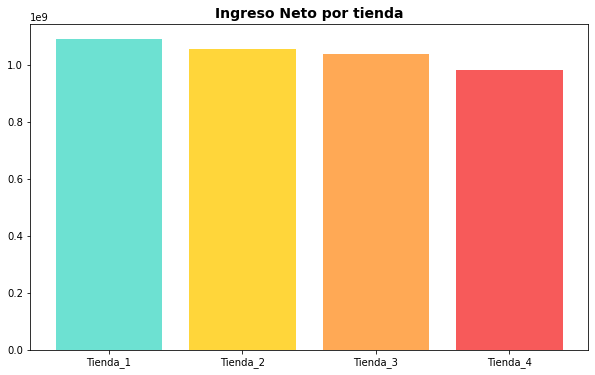

In [ ]:
import matplotlib.pyplot as plt

colors = ['#6DE1D2', '#FFD63A', '#FFA955', '#F75A5A']
plt.figure(figsize=(10,6))
plt.bar(x=tiendas_df['Tiendas'], height=tiendas_df['Ingreso Neto'], color = colors)
plt.title('Ingreso Neto por tienda', fontsize=14, fontweight='bold')
plt.show()

> La grafica nos muestra que el ingreso neto de cada tienda son muy similares.

> La tienda 1 es la que mayor ingreso neto posee.

> La tienda 4 es la que menor ingreso neto presenta.

## 2.2 Categorias mas vendidas

In [ ]:
df_melt = df_categorias_tiendas.melt(id_vars='Categoria',
                                     value_vars=['Cantidad_T1', 'Cantidad_T2', 'Cantidad_T3', 'Cantidad_T4'],
                                     var_name='Tiendas',
                                     value_name='Cantidad')

df_melt

,Categoria,Tiendas,Cantidad
0,Muebles,Cantidad_T1,465
1,Electrónicos,Cantidad_T1,448
2,Juguetes,Cantidad_T1,324
3,Electrodomésticos,Cantidad_T1,312
4,Deportes y diversión,Cantidad_T1,284
5,Instrumentos musicales,Cantidad_T1,182
6,Libros,Cantidad_T1,173
7,Artículos para el hogar,Cantidad_T1,171
8,Muebles,Cantidad_T2,442
9,Electrónicos,Cantidad_T2,422


In [ ]:
df_melt['Cantidad'] = pd.to_numeric(df_melt['Cantidad'], errors='coerce')
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Categoria  32 non-null     object
 1   Tiendas    32 non-null     object
 2   Cantidad   32 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 896.0+ bytes


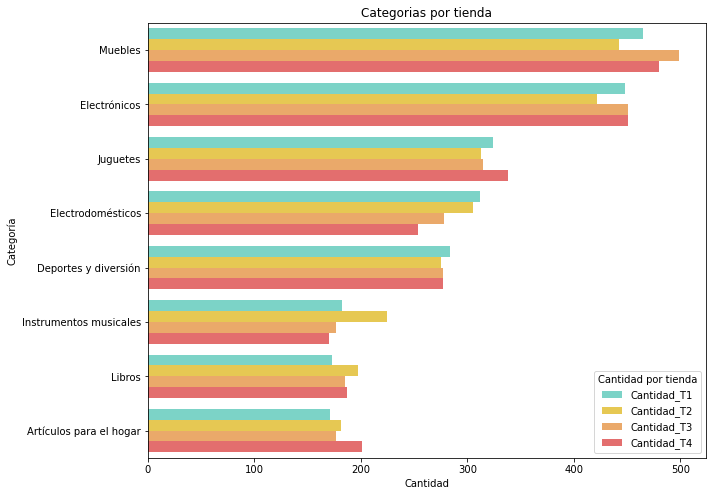

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ['#6DE1D2', '#FFD63A', '#FFA955', '#F75A5A']

plt.figure(figsize=(10,8))
sns.barplot(data=df_melt, y='Categoria', x='Cantidad', hue='Tiendas', palette=colors)
plt.title("Categorias por tienda")
plt.ylabel("Categoría")
plt.xlabel("Cantidad")
plt.legend(title='Cantidad por tienda')
plt.show()

> Si comparamos las primeras 5 categorias por tienda vemos que las tiendas 3 y 4 son las que mayor cantidad de muebles y electronicos venden.

> La tienda 1 vende la mayor cantidad de electrodomesticos y articulos de deporte y diversion.

> En cuanto a los juguetes, la tienda 4 es la que mas vende de esta categoria.

> Para entender que tienda en mas rentable de acuerdo a la categoria que mas vende es importante conocer el margen de ganancia de cada categoria. Esto es un dato que desconocemos.

Ahora, vamos a crear una grafica que muestre los ingresos generados por categoria para cada tienda. Esto ayuda a basarnos en las categorias que mas ingresos dejan a las tiendas. 

In [20]:
df_melt2 = ingresosC_tiendas.melt(id_vars='Categoria',
                                     value_vars=['Ingreso_T1', 'Ingreso_T2', 'Ingreso_T3', 'Ingreso_T4'],
                                     var_name='Tiendas',
                                     value_name='Ingreso')

df_melt2

,Categoria,Tiendas,Ingreso
0,Artículos para el hogar,Ingreso_T1,12698400.0
1,Deportes y diversión,Ingreso_T1,39290000.0
2,Electrodomésticos,Ingreso_T1,363685200.0
3,Electrónicos,Ingreso_T1,429493500.0
4,Instrumentos musicales,Ingreso_T1,91299000.0
5,Juguetes,Ingreso_T1,17995700.0
6,Libros,Ingreso_T1,8784900.0
7,Muebles,Ingreso_T1,187633700.0
8,Artículos para el hogar,Ingreso_T2,14746900.0
9,Deportes y diversión,Ingreso_T2,34744500.0


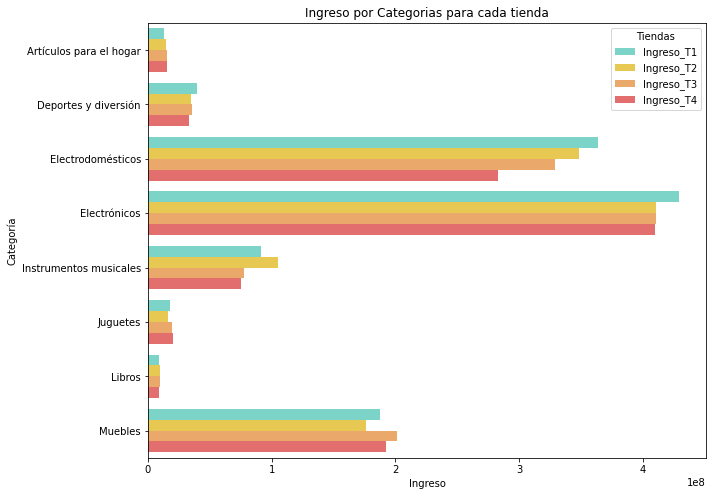

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ['#6DE1D2', '#FFD63A', '#FFA955', '#F75A5A']

plt.figure(figsize=(10,8))
sns.barplot(data=df_melt2, y='Categoria', x='Ingreso', hue='Tiendas', palette=colors)
plt.title("Ingreso por Categorias para cada tienda")
plt.ylabel("Categoría")
plt.xlabel("Ingreso")
plt.legend(title='Tiendas')
plt.show()

> La categoria que mas ingreso genera es Electronico, seguido de Electrodomesticos y Muebles.

> La tienda 1 es la que mayores ingresos obtiene en la mayoria de las categorias.

> A pesar que la tienda 4 vende una mayor cantidad de articulos correspondientes a Juguetes y Articulos para el hogar, vemos que dichas categorias genera ingresos muy bajos.

> Conocer el margen de ganancia por categoria nos ayuda a encontrar aquellas que mayor ingreso neto genera a las tiendas.

## 2.3 Costo Promedio de envio por tienda

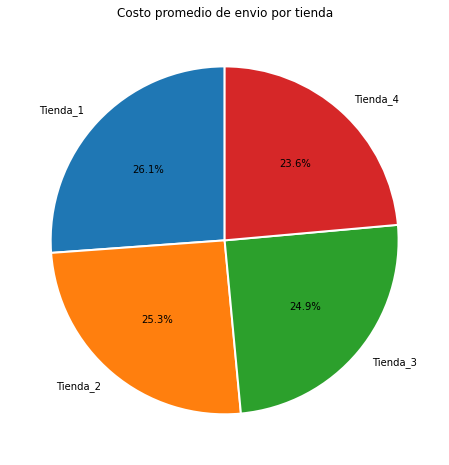

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(tiendas_df['Promedio Costo Envio'], labels=tiendas_df['Tiendas'], autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'white', 'linewidth': 2})
plt.title('Costo promedio de envio por tienda')
plt.show()

> Claramente vemos que en promedio, se gasta menos en costo de envios en la tienda 4. A pesar de este resultado, al calcular el ingreso neto por tienda encontramos que la tienda 4 es la que menos ingresos genera. Esto queda demostrado en la grafica de ingreso neto por tienda.

# 3. Informe final

Tras finalizar el analisis, notamos que la cateogria mas y menos vendida al igual que el producto mas y menos vendido no nos brinda informacion contundente sobre el rendimiento de las tiendas. Se requiere de informacion adicional como margen de ganancia, gastos de cada tienda, entre otros, para sacar provecho a estos dos aspectos.

Es por ello que en el análisis consideramos dos puntos:

- Calificacion por parte de los clientes.
- Ingreso neto, que se refiere al ingreso obtenido al restar al ingreso total por tienda el costo de envio.

En lo que sigue, mostramos un dataframe con un resumen de los puntos anteriores por tienda.

In [ ]:
var_rel = ['Tiendas', 'Ingreso_Total', 'Calificacion', 'Ingreso Neto']

insight_df = tiendas_df[var_rel]

insight_df

,Tiendas,Ingreso_Total,Calificacion,Ingreso Neto
0,Tienda_1,1.150880e+09,3.98,1.089502e+09
1,Tienda_2,1.116344e+09,4.04,1.056858e+09
2,Tienda_3,1.098020e+09,4.05,1.039503e+09
3,Tienda_4,1.038376e+09,4.00,9.830583e+08


> La tienda con peor calificacion es la 1. Sin embargo, tambien es la tienda que genera mayor ingreso neto. Esto sugiere que debe mejorarse el area de atencion al cliente para aumentar la productividad.

> La tienda con mejor calificacion es la 3. Presenta el tercer mejor ingreso neto por lo que se propone revisar la logistica, distribucion y los tipos de productos que se manejan para aprovechar el visto bueno de los clientes y aumentar el ingreso neto.

> La tienda con menor ingreso neto es la 4. Cuenta con una calificacion intermedia baja. Esto sugiere que los clientes la consideran regular. Tomando en cuenta los dos criterios anteriores, consideramos que la tienda 4 es la que debe ser vendida.

> Si contaramos con informacion como el margen de ganancia de cada producto vendido, asi como gastos de cada tienda, la eleccion podria ser diferente.

# 4. Analisis del desempeño geografico

Vamos a explorar las coordenadas geográficas de los datos de ventas e identificar patrones relacionados con la ubicación de las compras.

In [23]:
import folium

In [27]:
mapa = folium.Map(location=[tienda['lat'].mean(), tienda['lon'].mean()], zoom_start=3)

for _, row in tienda.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(mapa)

mapa